In [1]:
# Test how ALE/MOM_regridding.F90 evaluates the interfaces of the diagnostic grid
# when rho2 is specified and the RFNC options is noted
# (see comments on Evernote)

# This is how the function looks in the Fortran code 
# (where the terms after read are what is specified after RFNC1: in MOM_input)

#   read( string, *) nk, rho_1, rho_2, rho_3, drho, rho_4, drho_min
#   allocate(rho_target(nk+1))
#   nki = nk + 1 - 4 ! Number of interfaces minus 4 specified values
#   rho_target(1) = rho_1
#   rho_target(2) = rho_2
#   dx = 0.
#   do k = 0, nki
#     ddx = max( drho_min, real(nki-k)/real(nki*nki) )
#     dx = dx + ddx
#     rho_target(3+k) = rho_3 + (2. * drho) * dx
#   enddo
#   rho_target(nki+4) = rho_4

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min,plot=True):
    rho_target = np.zeros(nk+1)
    rho_target[:]=np.nan
    rho_target[0]=rho_1
    rho_target[1]=rho_2

    nki = nk+1-4
    dx = 0
    for k in range(nki+1):
        ddx = np.max([drho_min, (nki-k)/(nki*nki)])
        dx = dx + ddx
        rho_target[3-1+k] = rho_3 + (2*drho)*dx
    
    rho_target[nki+4-1]=rho_4
    
    if plot:
        plt.plot(np.diff(rho_target),(rho_target[1:]+rho_target[:-1])/2,'.')
        plt.gca().set_xlim([0,1])
        plt.gca().set_title('delta rho as a function of rho')
    
    return rho_target

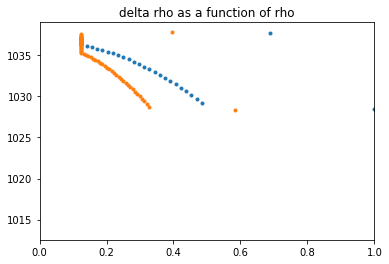

In [8]:
nk = 35
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.5
drho = 8
rho_4 = 1038
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

nk = 51
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.25
drho = 8
rho_4 = 1038
drho_min = 0.0078125

rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

# nk = 35
# rho_1 = 999.5
# rho_2 = 1010.5
# rho_3 = 1010.75
# drho = 8
# rho_4 = 1038
# drho_min = 0.0078125

# rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

# nk = 67
# rho_1 = 999.5
# rho_2 = 1028
# rho_3 = 1028.125
# drho = 8
# rho_4 = 1038
# drho_min = 0.00390625

# rho_target = rho_function1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)

In [10]:
rho_target

array([ 999.5       , 1028.        , 1028.375     , 1028.62109375,
       1028.86328125, 1029.1015625 , 1029.3359375 , 1029.56640625,
       1029.79296875, 1030.015625  , 1030.234375  , 1030.44921875,
       1030.66015625, 1030.8671875 , 1031.0703125 , 1031.26953125,
       1031.46484375, 1031.65625   , 1031.84375   , 1032.02734375,
       1032.20703125, 1032.3828125 , 1032.5546875 , 1032.72265625,
       1032.88671875, 1033.046875  , 1033.203125  , 1033.35546875,
       1033.50390625, 1033.6484375 , 1033.7890625 , 1033.92578125,
       1034.05859375, 1034.1875    , 1034.3125    , 1034.43359375,
       1034.55078125, 1034.6640625 , 1034.7734375 , 1034.87890625,
       1034.98046875, 1035.078125  , 1035.171875  , 1035.26171875,
       1035.34765625, 1035.4296875 , 1035.5078125 , 1035.58203125,
       1035.65234375, 1035.71875   , 1035.78125   , 1035.84375   ,
       1035.90625   , 1035.96875   , 1036.03125   , 1036.09375   ,
       1036.15625   , 1036.21875   , 1036.28125   , 1036.34375